In [1]:
%matplotlib notebook
import csv
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
import scipy.constants as c

In [223]:
cd "\\linna\Users\Magpie\Documents\MAGPIE data\2016\Oct_2016\s1012_16 2D Grid - W- Burdiscope\s1012_16 BS"

\\linna\Users\Magpie\Documents\MAGPIE data\2016\Oct_2016\s1012_16 2D Grid - W- Burdiscope\s1012_16 BS


In [237]:
zero=bk=plt.imread('s1012_16_120429_c1_no_laser_background.png')
bk=plt.imread('s1012_16_120730_c1_laser_background.png')
sh=plt.imread('s1012_16_121258_c1_shot.png')

<IPython.core.display.Javascript object>


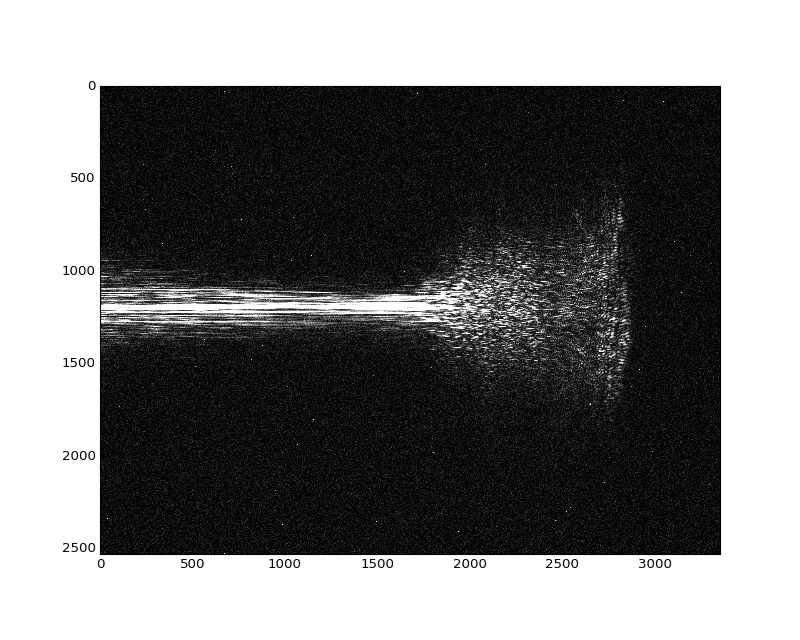

In [239]:
fig, ax=plt.subplots(figsize=(10,8))
ax.imshow(sh-zero, cmap='gray', clim=[0.000,0.005])

In [94]:
sh.max()

0.27774471

<IPython.core.display.Javascript object>


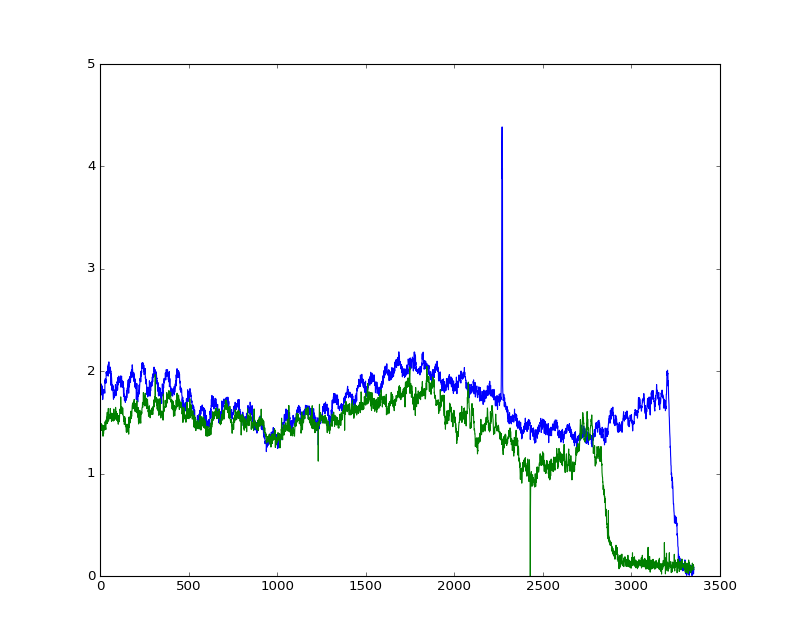

(0, 5.0)

In [240]:
fig, ax=plt.subplots(figsize=(10,8))
ax.plot((bk-zero).sum(axis=0))
ax.plot((sh-zero).sum(axis=0))
ax.set_ylim([0,None])

<IPython.core.display.Javascript object>


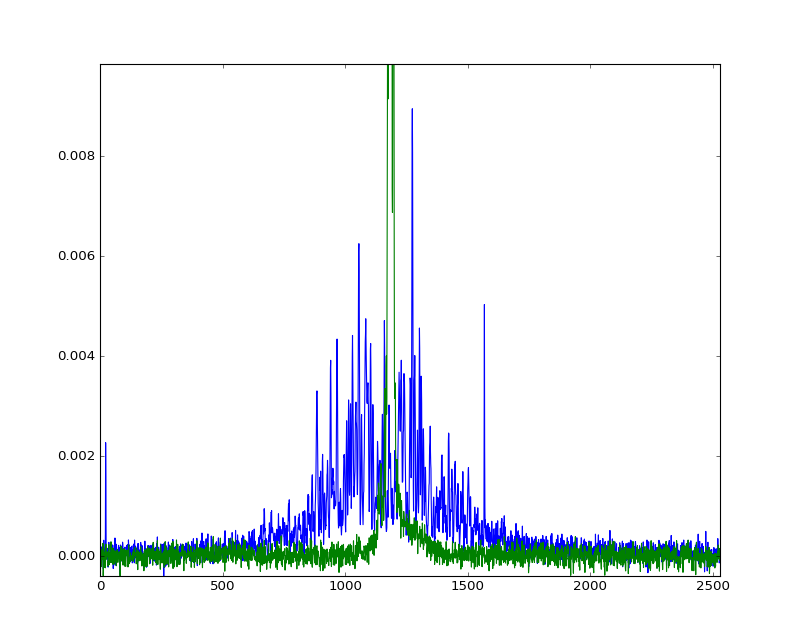

In [244]:
i=2150
win=10
s=(sh-zero)[:,i-win:i+win].mean(axis=1)
b=(bk-zero)[:,i-win:i+win].mean(axis=1)

fig, ax=plt.subplots(figsize=(10,8))
ax.plot(s)
ax.plot(b)
ax.set_ylim([s.min(), s.max()*1.1])
ax.set_xlim([0, bk.shape[0]])

i=2500
win=10
s=(sh-zero)[:,i-win:i+win].mean(axis=1)
b=(bk-zero)[:,i-win:i+win].mean(axis=1)
#ax.plot(s)
#ax.plot(b)


#s=sh[:,i-5*win:i+5*win].mean(axis=1)
#ax.plot(s)

In [136]:
cd '..'

\\linna\Users\Magpie\Documents\MAGPIE data\2016\Oct_2016\s1011_16 2D Grid - W - Burdiscope


In [159]:
shadow=plt.imread('s1011_16 IR Shadowgraphy (2).JPG')
shadow=shadow.sum(axis=2)

<IPython.core.display.Javascript object>


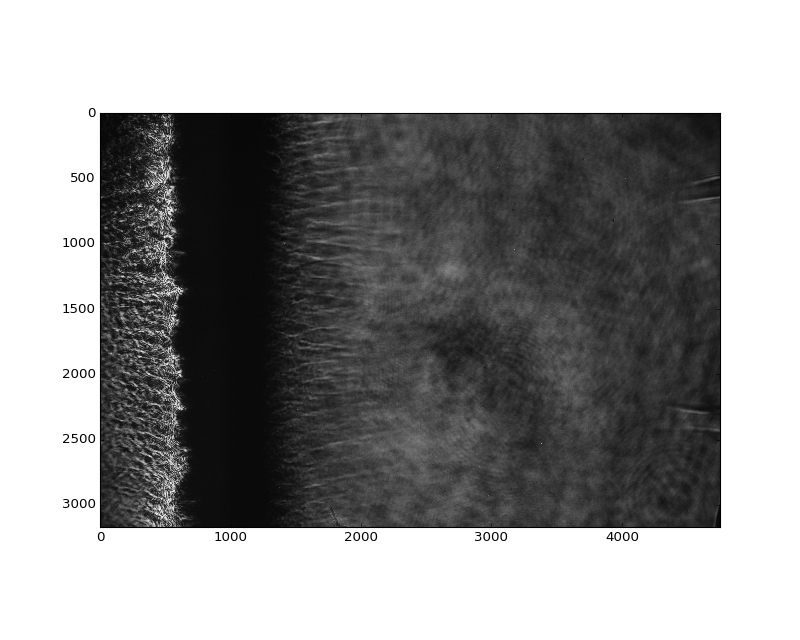

In [219]:
fig, ax=plt.subplots(figsize=(10,8))
ax.imshow(shadow, cmap='gray')

<IPython.core.display.Javascript object>


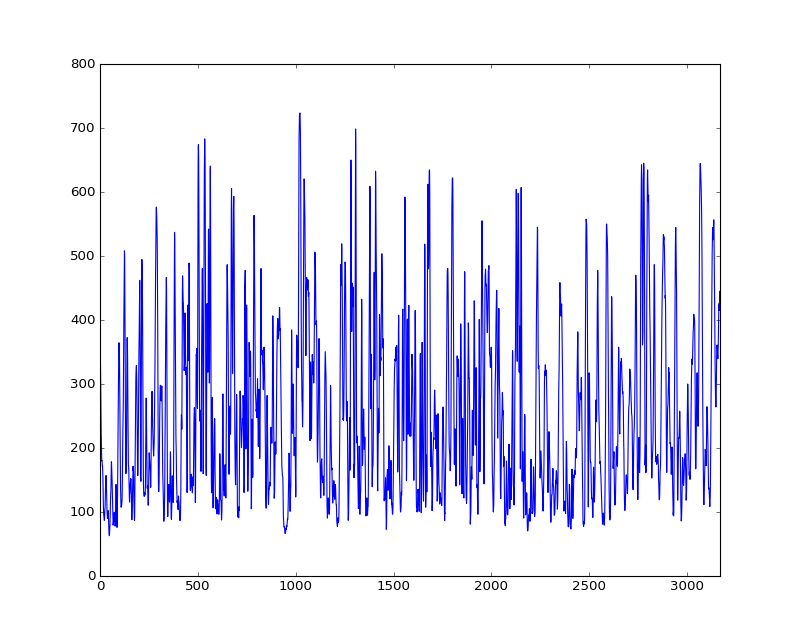

(0, 3168)

In [176]:
i=442
win=1
ss=shad[:,i-win:i+win].mean(axis=1)
fig, ax=plt.subplots(figsize=(10,8))
ax.plot(ss)
ax.set_xlim([0, shadow.shape[0]])

<IPython.core.display.Javascript object>


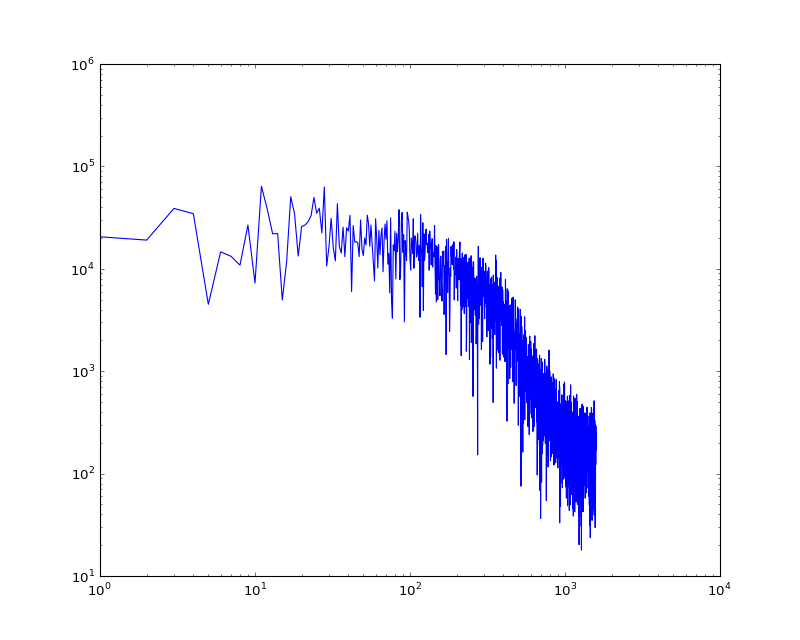

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [217]:
sft=np.fft.fft(ss)
sftr=np.abs(sft)
fig, ax=plt.subplots(figsize=(10,8))
ax.loglog(sftr[0:sftr.size/2])
#ax.set_xlim([100,2000])

<IPython.core.display.Javascript object>


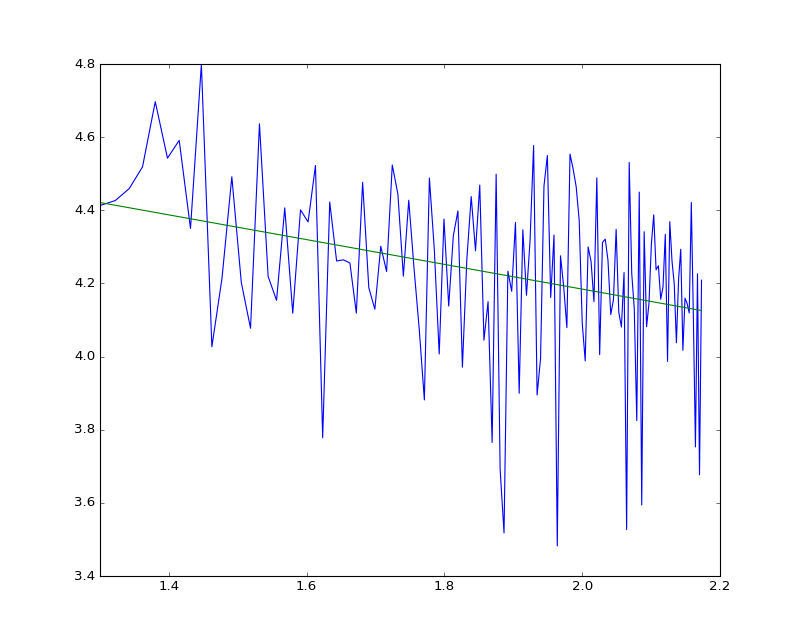

In [221]:
fmin=20
fmax=150
Logsh=np.log10(sftr[fmin:fmax])
LogX=np.log10(np.arange(fmin,fmax))
coefficients = np.polyfit(LogX, Logsh, 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(LogX)
fig, ax=plt.subplots(figsize=(10,8))
ax.plot(LogX, Logsh)
ax.plot(LogX, ys)

In [222]:
polynomial

poly1d([-0.33831557,  4.8610735 ])

In [188]:
np.logspace?

In [101]:
from scipy.signal import deconvolve

In [128]:
d=deconvolve(s,b[1357-20:1357+20])

<IPython.core.display.Javascript object>


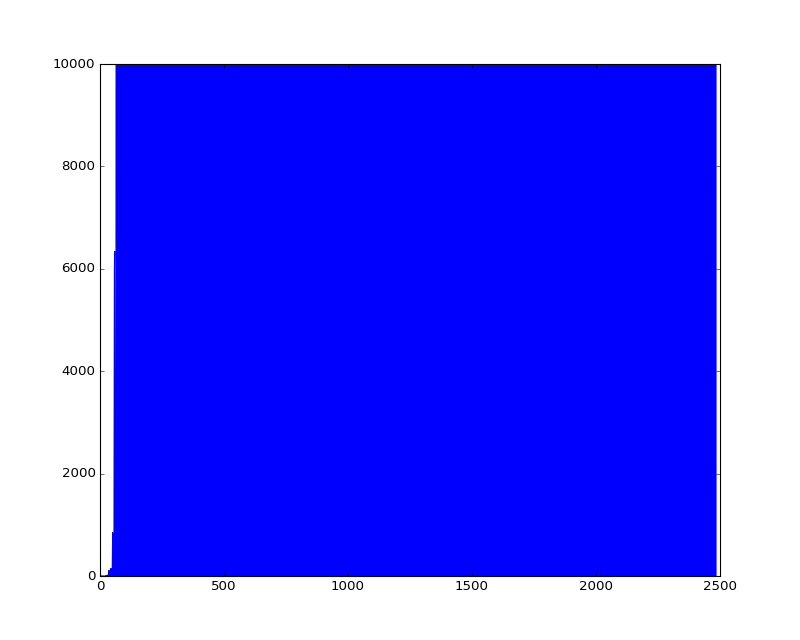

(0, 10000)

In [127]:
fig, ax=plt.subplots(figsize=(10,8))
ax.plot(d[0])
#ax.set_ylim([s.min(), s.max()*1.1])
ax.set_ylim([0, 10000])

In [129]:
d[0]

array([  7.54138029e-001,  -6.03978999e-002,   3.92522932e-002, ...,
         1.13230214e+196,   1.47350166e+196,   1.32857492e+196])

In [113]:
s.shape

(2529,)